# **Stunting Detection**
**by Dyah Anggun Nisrina Humaira Putri**

# **Import Library**

In [404]:
#library yang sangat dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk model selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

#library untuk model evaluation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **Exploratory Data Analysis**

In [405]:
#membaca dataset
data_stunting = pd.read_csv("/kaggle/input/faktor-stunting/Stunting_Dataset.csv")

#cek info dataset
data_stunting.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         10000 non-null  object 
 1   Age            10000 non-null  int64  
 2   Birth Weight   10000 non-null  float64
 3   Birth Length   10000 non-null  int64  
 4   Body Weight    10000 non-null  float64
 5   Body Length    10000 non-null  float64
 6   Breastfeeding  10000 non-null  object 
 7   Stunting       10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [406]:
#cek deskripsi data
data_stunting.describe()

,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,14.255000,2.757600,49.117400,7.631990,68.85492
std,7.923285,0.291092,0.439814,1.720461,8.90664
min,6.000000,2.000000,48.000000,2.900000,49.00000
25%,10.000000,2.800000,49.000000,6.400000,65.00000
50%,13.000000,2.800000,49.000000,7.700000,68.30000
75%,15.000000,2.900000,49.000000,9.000000,72.20000
max,48.000000,3.100000,50.000000,10.500000,92.70000


In [407]:
#melihat bagian atas dataset
data_stunting.head()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
0,Male,17,3.0,49,10.0,72.2,No,No
1,Female,11,2.9,49,2.9,65.0,No,Yes
2,Male,16,2.9,49,8.5,72.2,No,Yes
3,Male,31,2.8,49,6.4,63.0,No,Yes
4,Male,15,3.1,49,10.5,49.0,No,Yes


In [408]:
#melihat bagian bawah dataset
data_stunting.tail()

,Gender,Age,Birth Weight,Birth Length,Body Weight,Body Length,Breastfeeding,Stunting
9995,Male,15,3.0,49,9.0,63.0,No,Yes
9996,Female,12,2.8,48,7.7,63.0,No,No
9997,Male,16,2.8,49,7.7,49.0,No,No
9998,Male,14,2.8,49,10.0,69.0,No,Yes
9999,Female,10,3.0,49,7.7,80.0,No,Yes


In [409]:
#cek datatype setiap column
data_stunting.dtypes

Gender            object
Age                int64
Birth Weight     float64
Birth Length       int64
Body Weight      float64
Body Length      float64
Breastfeeding     object
Stunting          object
dtype: object

In [410]:
#cek dimensi data
print("Dimensi Data: {}".format(data_stunting.shape))

Dimensi Data: (10000, 8)


In [411]:
#cek missing values
data_stunting.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

hasil menunjukan bahwa dataset tidak memiliki missing value

In [412]:
#melihat ada berapa orang yang menderita stunting
data_stunting.groupby('Stunting').size()

Stunting
No     2045
Yes    7955
dtype: int64

Stunting
No     [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
Yes    [[Axes(0.125,0.666111;0.336957x0.213889), Axes...
dtype: object

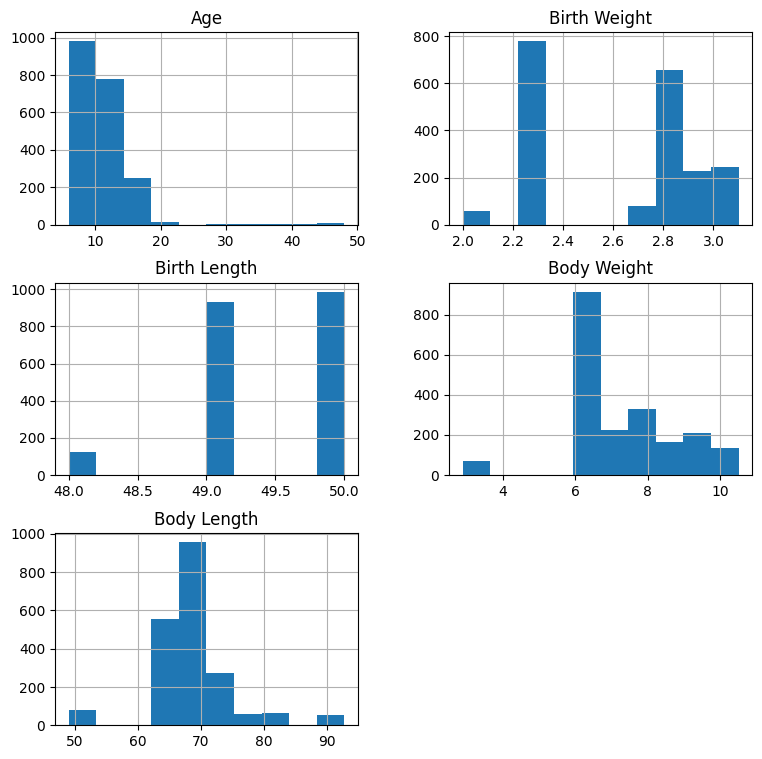

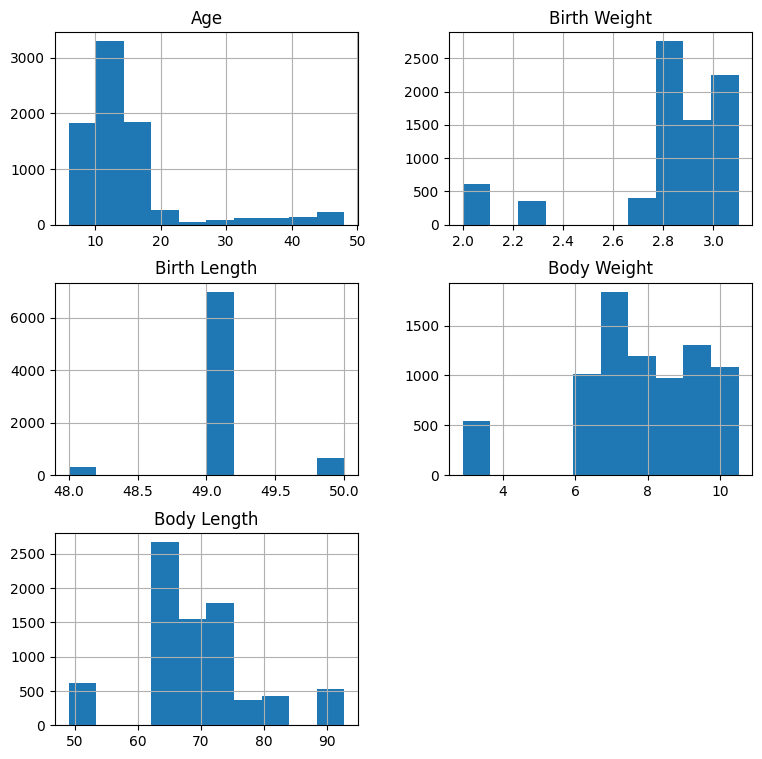

In [413]:
#melihat distribusi data menggunakan histogram
data_stunting.groupby('Stunting').hist(figsize=(9,9))

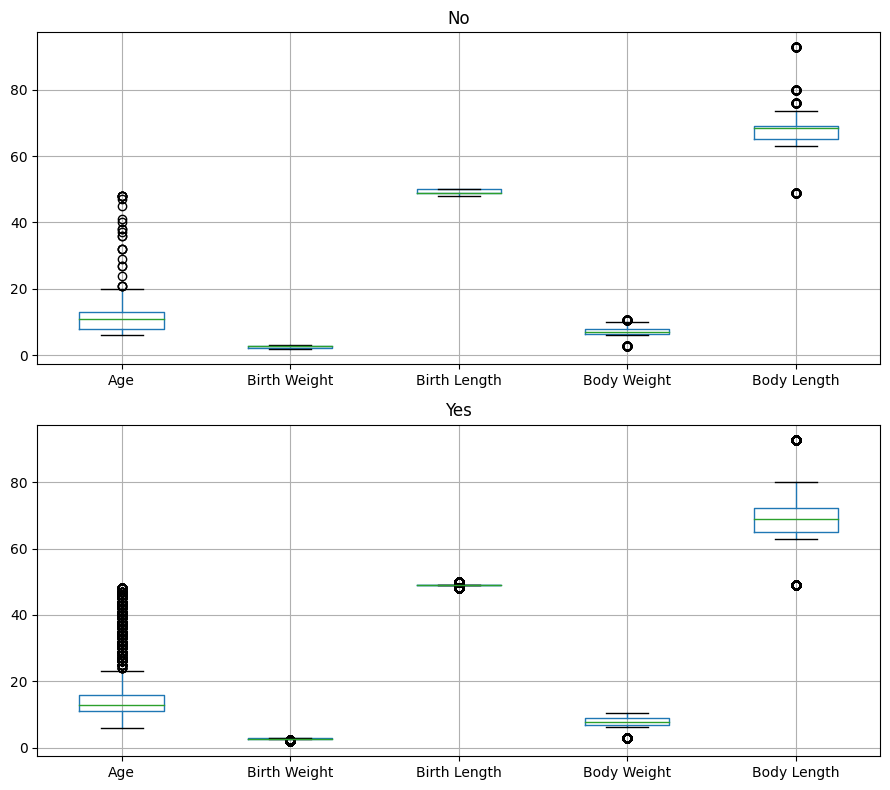

In [414]:
#melihat persebaran data dan cek outliers menggunakan boxplot
num_groups = data_stunting['Stunting'].nunique()
data_stunting.groupby('Stunting').boxplot(figsize=(9, 4 * num_groups), layout=(num_groups, 1))

plt.tight_layout()
plt.show()

hasil menunjukan bahwa ada outliers pada dataset

# **Data Preprocessing**

In [415]:
#cek missing data
data_stunting.isnull().sum()

Gender           0
Age              0
Birth Weight     0
Birth Length     0
Body Weight      0
Body Length      0
Breastfeeding    0
Stunting         0
dtype: int64

seperti hasil sebelumnya, dataset tidak memiliki data yang kosong

In [416]:
#menghitung duplicate data
duplicate_count = data_stunting.duplicated().sum()
print(f"Jumlah duplicate data: {duplicate_count}")

#handling duplicate data
data_stunting = data_stunting.drop_duplicates()
data_stunting.describe()

Jumlah duplicate data: 2427


,Age,Birth Weight,Birth Length,Body Weight,Body Length
count,7573.000000,7573.000000,7573.000000,7573.000000,7573.000000
mean,14.886967,2.762208,49.084643,7.630648,69.120269
std,8.580291,0.297725,0.436202,1.762529,9.401527
min,6.000000,2.000000,48.000000,2.900000,49.000000
25%,10.000000,2.800000,49.000000,7.000000,65.000000
50%,13.000000,2.800000,49.000000,7.700000,69.000000
75%,16.000000,3.000000,49.000000,9.000000,72.200000
max,48.000000,3.100000,50.000000,10.500000,92.700000


sekarang duplicate data sudah hilang

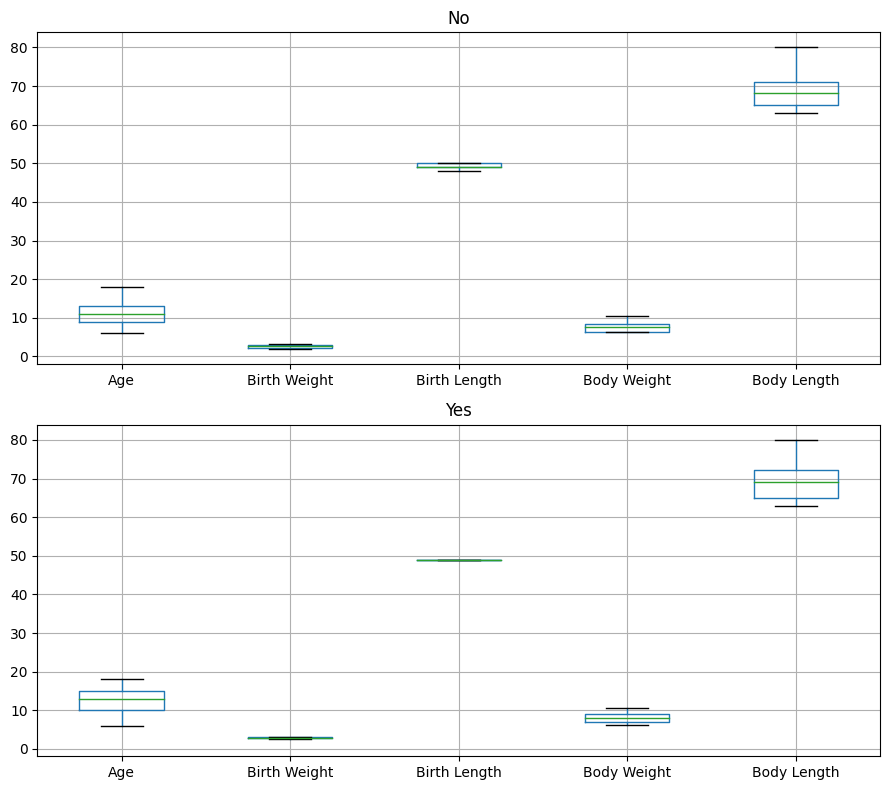

In [417]:
#filter dataset agar hanya berisi orang berusia 18 tahun dan di bawahnya
data_stunting = data_stunting[data_stunting['Age'] <= 18]

#list kolom yang memiliki outlier
columns_to_check = ['Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length']

#handling outlier
groups = data_stunting['Stunting'].unique()
cleaned_data = []

for group in groups:
    group_data = data_stunting[data_stunting['Stunting'] == group]
    
    #menghapus outlier untuk setiap kolom di dalam group
    for column in columns_to_check:
        while True:
            Q1 = group_data[column].quantile(0.25)
            Q3 = group_data[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            before_removal = group_data.shape[0]
            
            #filter outlier
            group_data = group_data[(group_data[column] >= lower_bound) & (group_data[column] <= upper_bound)]
            after_removal = group_data.shape[0]
            
            #jika tidak ada outlier yang perlu dihapus, hentikan loop
            if before_removal == after_removal:
                break
    
    #tambahkan cleaned group data ke list
    cleaned_data.append(group_data)

#gabungkan cleaned data dari semua group
data_stunting_cleaned = pd.concat(cleaned_data)

#cek outlier lagi menggunakan boxplots
num_groups = data_stunting_cleaned['Stunting'].nunique()
data_stunting_cleaned.groupby('Stunting').boxplot(figsize=(9, 4 * num_groups), layout=(num_groups, 1))

plt.tight_layout()
plt.show()

In [418]:
#mappings untuk categorical data
gender_mapping = {'Male': 1, 'Female': 0}
stunting_mapping = {'Yes': 1, 'No': 0}
breastfeeding_mapping = {'Yes': 1, 'No': 0}

#print unique values
print("Unique values in Gender column:", data_stunting['Gender'].unique())
print("Unique values in Stunting column:", data_stunting['Stunting'].unique())
print("Unique values in Breastfeeding column:", data_stunting['Breastfeeding'].unique())

#menggunakan mappings untuk mengkonversi categorical data ke numerical values
data_stunting['Gender'] = data_stunting['Gender'].map(gender_mapping)
data_stunting['Stunting'] = data_stunting['Stunting'].map(stunting_mapping)
data_stunting['Breastfeeding'] = data_stunting['Breastfeeding'].map(breastfeeding_mapping)

#cek hasil konversi
print("Data hasil konversi:\n", data_stunting.head())

#cek apakah masih ada NaN values atau tidak
print("NaN values Gender:", data_stunting['Gender'].isna().sum())
print("NaN values Stunting:", data_stunting['Stunting'].isna().sum())
print("NaN values Breastfeeding:", data_stunting['Breastfeeding'].isna().sum())

Unique values in Gender column: ['Male' 'Female']
Unique values in Stunting column: ['No' 'Yes']
Unique values in Breastfeeding column: ['No']
Data hasil konversi:
    Gender  Age  Birth Weight  Birth Length  Body Weight  Body Length  \
0       1   17           3.0            49         10.0         72.2   
1       0   11           2.9            49          2.9         65.0   
2       1   16           2.9            49          8.5         72.2   
4       1   15           3.1            49         10.5         49.0   
5       0   11           2.8            49          8.5         65.0   

   Breastfeeding  Stunting  
0              0         0  
1              0         1  
2              0         1  
4              0         1  
5              0         0  
NaN values Gender: 0
NaN values Stunting: 0
NaN values Breastfeeding: 0


Sekarang categorical data sudah berubah menjadi numeric data

# **Model Selection & Evaluation**

In [419]:
#menentukan variabel x dan y
nama_faktor = ['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Breastfeeding']

X = data_stunting[nama_faktor]
y = data_stunting['Stunting']

Model bertujuan untuk melakukan deteksi stunting pada anak menggunakan 7 data, yaitu jenis kelamin, umur, berat dan panjang badan ketika lahir, berat dan panjang badan saat ini, dan status menyusui anak.

In [420]:
#membuat daftar model
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('XGB', xgb.XGBClassifier(use_label_encoder=False)))

Daftar model machine learning yang dapat digunakan dibuat

In [421]:
#memisahkan train dan test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

Train data dan test data telah dipisahkan

In [422]:
#membuat sampel sintetis baru dari kelas minoritas
smote = SMOTE(random_state= 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

Karena data anak yang tidak menderita stunting (normal) lebih sedikit dari data anak yang menderita stunting, SMOTE dilakukan untuk menyeimbangkan data

In [423]:
#validasi silang (K-cross validation)
names = []
scores = []

for name, model in models:
    pipeline = Pipeline([
        ('smote', smote),
        ('model', model)
    ])
    
    #K-Fold cross-validation
    kfold = KFold(n_splits=10, shuffle=True, random_state=10)
    score = cross_val_score(pipeline, X_resampled, y_resampled, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)

#menyimpan hasil cross-validation dalam DataFrame
kf_cross_val = pd.DataFrame({'Nama': names, 'Nilai': scores})
print(kf_cross_val)

  Nama     Nilai
0  KNN  0.730531
1  SVC  0.609179
2   LR  0.622609
3   DT  0.786087
4  GNB  0.662126
5   RF  0.831691
6   GB  0.846860
7  XGB  0.855845


Hasil K-cross validation menunjukan bahwa model Extreme Gradient Boosting (XGB) memiliki akurasi yang paling tinggi. Hal ini menunjukan bahwa Extreme Gradient Boosting adalah model yang paling cocok untuk digunakan

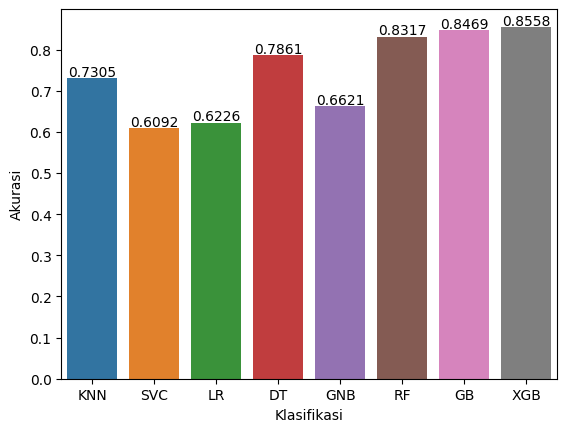

In [424]:
#menampilkan tabel akurasi dengan grafik
axis = sns.barplot(x='Nama', y='Nilai', data=kf_cross_val)
axis.set(xlabel='Klasifikasi', ylabel='Akurasi')

#menambahkan nilai akurasi di atas setiap batang
for p in axis.patches:
    tinggi = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, tinggi + 0.005, '{:1.4f}'.format(tinggi), ha="center")

#menampilkan plot
plt.show()

# **Extreme Gradient Boosting**

In [425]:
#meinisialisasi model XGBoost
xgb_model = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss')

#membuat pipeline dengan SMOTE dan model XGBoost
pipeline_xgb = Pipeline([
    ('smote', SMOTE(random_state=42)),  # Pastikan SMOTE diinisialisasi dengan benar
    ('model', xgb_model)
])

#mendefinisikan parameter grid untuk pencarian hyperparameter XGBoost
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 4, 5]
}

#menginisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=pipeline_xgb,
                           param_grid=param_grid,
                           cv=3,
                           scoring='accuracy',
                           verbose=1)

#melatih GridSearchCV
grid_search.fit(X_train_resampled, y_train_resampled)

#mencetak parameter terbaik
print(f'Parameter terbaik: {grid_search.best_params_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Parameter terbaik: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__n_estimators': 100}


**Hasil GridSearchCV**

* **Jumlah Fitting**: 81 kali pelatihan dilakukan, yang mencakup 3 lipatan cross-validation untuk setiap dari 27 kombinasi parameter.
* **Parameter Terbaik**:
* **Learning Rate**: 0.2
* **Max Depth**: 5
* **Number of Estimators**: 100

Parameter ini memberikan kombinasi terbaik berdasarkan pencarian hyperparameter dan evaluasi model selama proses GridSearchCV.

In [426]:
#mendapatkan model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_

#mevalidasi silang untuk model terbaik
kfold = KFold(n_splits=10, shuffle=True, random_state=10)
predictions_xgb = cross_val_predict(best_model, X_resampled, y_resampled, cv=kfold, method='predict')

#menghitung metrik untuk model XGBoost terbaik
accuracy_xgb = accuracy_score(y_resampled, predictions_xgb)
report_xgb = classification_report(y_resampled, predictions_xgb)
conf_matrix_xgb = confusion_matrix(y_resampled, predictions_xgb)

#menampilkan hasil untuk XGBoost
print(f'Akurasi XGBoost: {accuracy_xgb:.2f}')
print(f'Laporan Klasifikasi XGBoost:\n{report_xgb}')
print(f'Confusion Matrix XGBoost:\n{conf_matrix_xgb}')

Akurasi XGBoost: 0.86
Laporan Klasifikasi XGBoost:
              precision    recall  f1-score   support

           0       0.91      0.80      0.85      5175
           1       0.82      0.92      0.87      5175

    accuracy                           0.86     10350
   macro avg       0.86      0.86      0.86     10350
weighted avg       0.86      0.86      0.86     10350

Confusion Matrix XGBoost:
[[4151 1024]
 [ 435 4740]]


* **Akurasi**: Model memiliki akurasi 86%, menunjukkan seberapa sering model membuat prediksi yang benar
* **Precision**: Mengukur ketepatan model dalam memprediksi kelas positif (1) dan negatif (0). Precision untuk kelas 0 adalah 91%, sedangkan untuk kelas 1 adalah 82%
* **Recall**: Mengukur kemampuan model dalam menangkap semua kasus kelas positif dan negatif. Recall untuk kelas 0 adalah 80%, sedangkan untuk kelas 1 adalah 92%
* **F1-Score**: Menggabungkan precision dan recall menjadi satu metrik. F1-Score untuk kelas 0 adalah 85%, dan untuk kelas 1 adalah 87%
* **Confusion Matrix**: Menunjukkan jumlah prediksi benar dan salah untuk setiap kelas. Di sini, 4151 kasus kelas 0 diprediksi dengan benar, 1024 kasus kelas 0 diprediksi sebagai kelas 1, 435 kasus kelas 1 diprediksi sebagai kelas 0, dan 4740 kasus kelas 1 diprediksi dengan benar

# **Model Testing**

In [427]:
#menggunakan best_model yang diperoleh dari GridSearchCV
model = best_model  

while True:
    print("------------------------------------------")
    #memasukkan data pengguna
    gender = input("Masukan gender (Male/Female): ").strip().lower()
    if gender == 'male':
        gender = 1
    elif gender == 'female':
        gender = 0
    else:
        print("Masukan gender yang valid")
        continue

    age = float(input("Masukan umur: "))
    if age > 18:
        print("Hanya untuk orang berumur 18 tahun ke bawah")
        continue

    birth_weight = float(input("Masukan berat badan saat lahir (kg): "))
    birth_length = float(input("Masukan panjang badan saat lahir (cm): "))
    body_weight = float(input("Masukan berat badan saat ini (kg): "))
    body_length = float(input("Masukan panjang badan saat ini (cm): "))

    breastfeeding = input("Status menyusui (y/n): ").strip().lower()
    if breastfeeding == 'y':
        breastfeeding = 1
    elif breastfeeding == 'n':
        breastfeeding = 0
    else:
        print("Masukan status menyusui yang valid")
        continue

    #data baru yang akan diuji
    new_data = [[gender, age, birth_weight, birth_length, body_weight, body_length, breastfeeding]]

    #nama kolom sesuai dengan data pelatihan
    nama_faktor = ['Gender', 'Age', 'Birth Weight', 'Birth Length', 'Body Weight', 'Body Length', 'Breastfeeding']

    #memasukkan new_data ke dalam DataFrame
    new_data_df = pd.DataFrame(new_data, columns=nama_faktor)

    #memprediksi kelas
    predicted_class = model.predict(new_data_df)
    if predicted_class == 1:
        predicted_class = 'Stunting'
    elif predicted_class == 0:
        predicted_class = 'Normal'
    print(f"Prediksi kelas: {predicted_class}")

    #memprediksi probabilitas
    predicted_probabilities = model.predict_proba(new_data_df)[0]
    
    #menghitung probabilitas dan menampilkan hasilnya
    prob_normal = predicted_probabilities[0] * 100
    prob_stunting = predicted_probabilities[1] * 100
    print(f"Prediksi probabilitas: {prob_normal:.2f}% Normal dan {prob_stunting:.2f}% Stunting")

    #membandingkan prediksi model dengan nilai aktual
    actual_class = input("Masukan nilai aktual (Stunting/Normal): ").strip().lower()
    if (predicted_class.lower() == actual_class):
        print("Prediksi model benar!")
    else:
        print("Prediksi model salah!")

    #tanya pengguna apakah ingin melanjutkan atau berhenti
    lanjut = input("Apakah Anda ingin menguji data lain? (y/n): ").strip().lower()
    if lanjut != 'y':
        break

------------------------------------------


Masukan gender (Male/Female):  female
Masukan umur:  18
Masukan berat badan saat lahir (kg):  4
Masukan panjang badan saat lahir (cm):  48
Masukan berat badan saat ini (kg):  37
Masukan panjang badan saat ini (cm):  152
Status menyusui (y/n):  n


Prediksi kelas: Stunting
Prediksi probabilitas: 2.92% Normal dan 97.08% Stunting


Masukan nilai aktual (Stunting/Normal):  Stunting


Prediksi model benar!


Apakah Anda ingin menguji data lain? (y/n):  n


Pada tahap ini model akan menerima input dari user dan akan mengembalikan output hasil prediksi kelas (stunting/normal) dan probabilitas (kemungkinan stunting/normal dalam persen). Lalu user dapat memasukan nilai aktual untuk memastikan apakah prediksi model benar atau salah